# Without preprocessing using KNN

In [10]:
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt

In [11]:
plt.style.use('ggplot')
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv ' , sep = ';') 

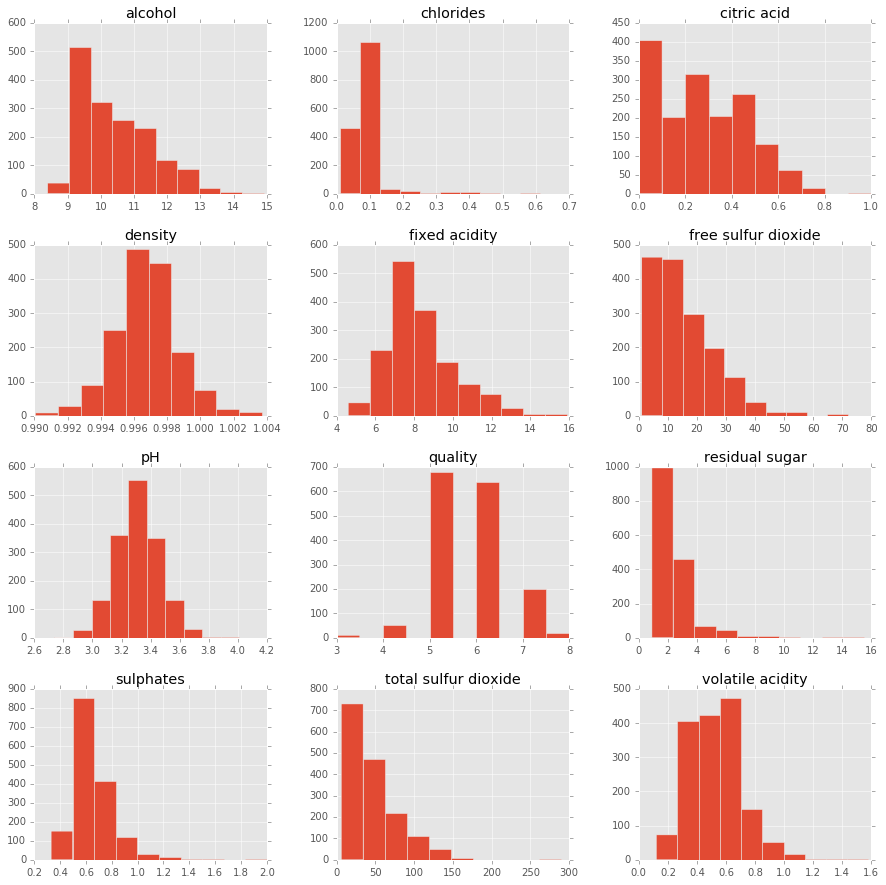

In [12]:
X = df.drop('quality' , 1).values 
y1 = df['quality'].values
pd.DataFrame.hist(df, figsize = [15,15]); 

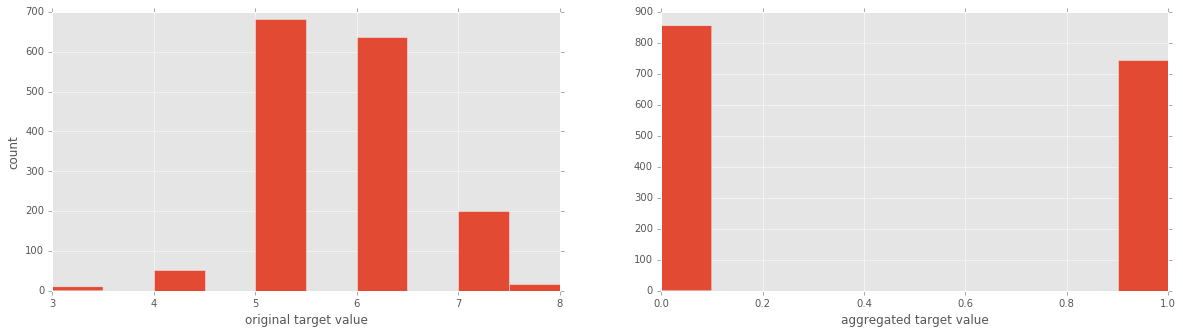

In [13]:
y = y1<=5
# plot histograms of original target variable
# and aggregated target variable
plt.figure(figsize=(20,5));
plt.subplot(1, 2, 1 );
plt.hist(y1);
plt.xlabel('original target value')
plt.ylabel('count')
plt.subplot(1, 2, 2);
plt.hist(y)
plt.xlabel('aggregated target value')
plt.show() 

In [14]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [15]:
from sklearn import neighbors, linear_model
knn = neighbors.KNeighborsClassifier(n_neighbors = 5)
knn_model_1 = knn.fit(X_train, y_train)
print('k-NN accuracy for test set: %f' % knn_model_1.score(X_test, y_test)) 

k-NN accuracy for test set: 0.612500


In [16]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test, knn_model_1.predict(X_test)
print(classification_report(y_true, y_pred)) 

             precision    recall  f1-score   support

      False       0.66      0.64      0.65       179
       True       0.56      0.57      0.57       141

avg / total       0.61      0.61      0.61       320



# To improve Test Accuracy, we need to preprocess the data

In [17]:
from sklearn.preprocessing import scale
Xs = scale(X)
from sklearn.cross_validation import train_test_split
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=42)
knn_model_2 = knn.fit(Xs_train, y_train)
print('k-NN score for test set: %f' % knn_model_2.score(Xs_test, y_test))
print('k-NN score for training set: %f' % knn_model_2.score(Xs_train, y_train))
y_true, y_pred = y_test, knn_model_2.predict(Xs_test)
print(classification_report(y_true, y_pred)) 

k-NN score for test set: 0.712500
k-NN score for training set: 0.814699
             precision    recall  f1-score   support

      False       0.72      0.79      0.75       179
       True       0.70      0.62      0.65       141

avg / total       0.71      0.71      0.71       320

